# Prevendo preço e estimativa de conclusão

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

SEED = 5
np.random.seed(SEED)

In [2]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados.rename(columns = a_renomear, inplace = True)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


A coluna nao_finalizado não é muito intuitiva

0: finalizados 1: não finalizados. 

Criaremos uma nova coluna chamada *finalizados*, trocaremos os valores 0 e 1, usando a função `.map()`.

In [4]:
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<AxesSubplot: xlabel='horas_esperadas', ylabel='preco'>

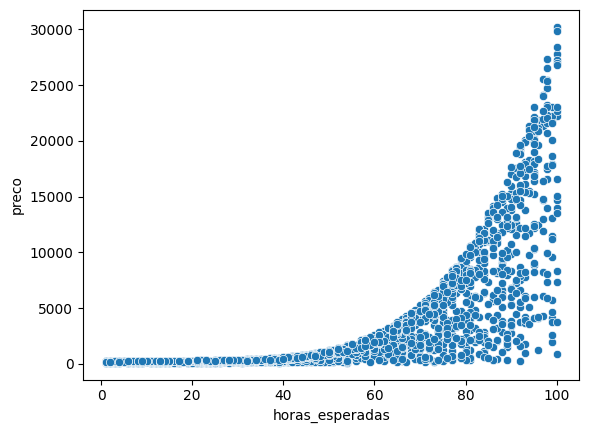

In [5]:
sns.scatterplot(x = "horas_esperadas", y = "preco", data = dados)

### `sns.scatterplot`
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

<AxesSubplot: xlabel='horas_esperadas', ylabel='preco'>

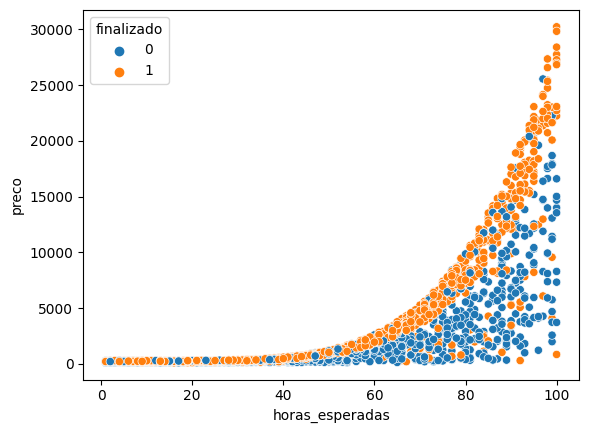

In [6]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

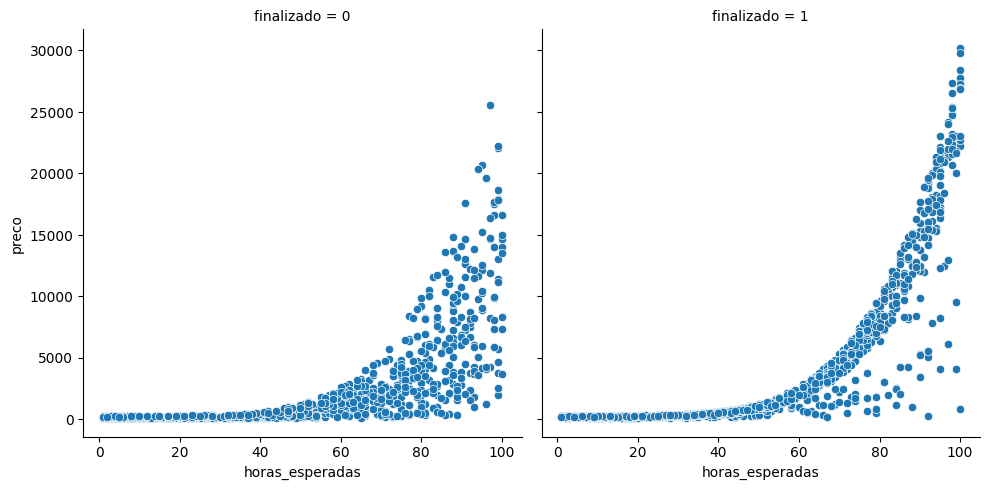

In [7]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", data=dados)

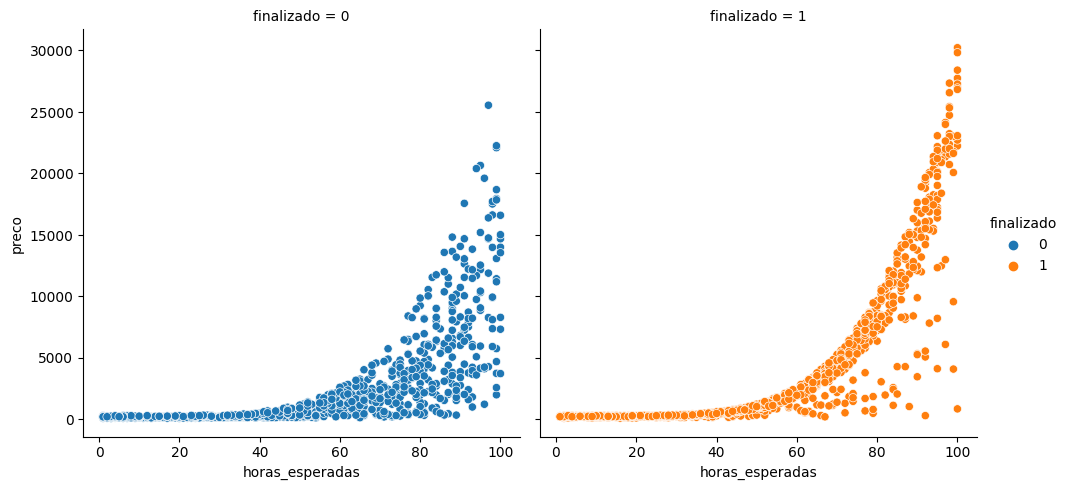

In [8]:
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)


In [9]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [10]:
#dividindo base em treino e test 
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#modelo = LinearSVC(max_iter = 900000)

modelo = LinearSVC() # cria modelo
modelo.fit(treino_x, treino_y)# treina modelo
previsoes = modelo.predict(teste_x)# aplica modelo

acuracia = accuracy_score(teste_y, previsoes) * 100 #verificando acurácia 
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 54.07%


/opt/anaconda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
# #dividindo base em treino e test 
# treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
#                                                          random_state = SEED, test_size = 0.25,
#                                                          stratify = y)

# print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# modelo = LinearSVC(max_iter = 900000)

# # modelo = LinearSVC() # cria modelo
# modelo.fit(treino_x, treino_y)# treina modelo
# previsoes = modelo.predict(teste_x)# aplica modelo

# acuracia = accuracy_score(teste_y, previsoes) * 100 #verificando acurácia 
# print("A acurácia foi %.2f%%" % acuracia)

### O algoritmo base converte uma coluna deixando somente 0 ou somente 1. Com isso nós implementamos o teste do algoritmo e obtemos o resultado. 
Significa testar o modelo contra uma estratégia de chutar tudo 0 ou tudo 1. Aqui embaixo tudo chutado pra 1.

In [12]:
previsoes_de_baseline = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_baseline) * 100
print("A acurácia da baseline foi %.2f%%" % acuracia)

A acurácia da baseline foi 52.59%


<AxesSubplot: xlabel='horas_esperadas', ylabel='preco'>

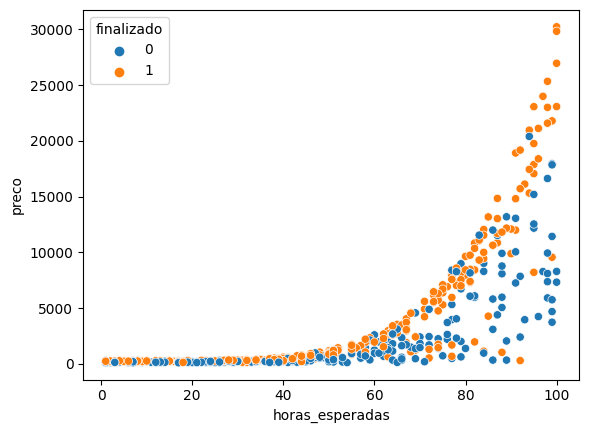

In [13]:
# visualização do modelo previsão (laranja) dados para previsão (azul)
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x) 

In [14]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)

1 100 100 30223


### O método `arange()` da biblioteca do `Numpy` permite gerar esse array com a distribuição dos intervalos no eixo X
https://numpy.org/doc/stable/reference/generated/numpy.arange.html

In [15]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

### Do Numpy o `np.meshgrid()`, que consegue mesclar um grid .
https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

In [16]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

### Ainda não mesclamos realmente esses dados. Para fazermos isso, usaremos o `.ravel()`
https://numpy.org/doc/stable/reference/generated/numpy.ravel.html

In [17]:
xx.ravel()

array([ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01])

### E concatena com o `np.c_`
https://numpy.org/doc/stable/reference/generated/numpy.c_.html?highlight=np%20c_

In [18]:
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [19]:
Z = modelo.predict(pontos)
Z.shape

/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


(10000,)

In [20]:
xx.shape

(100, 100)

In [21]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

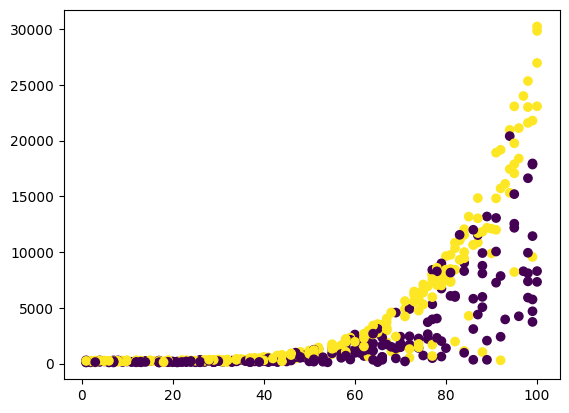

In [22]:
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y)

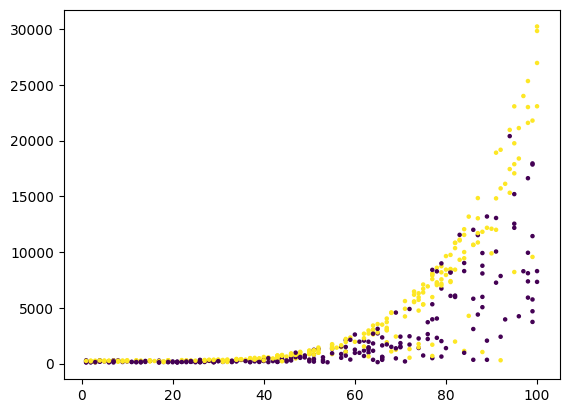

In [23]:
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=5)

### Usaremos `plt.contourf()` (de countor, ou "contorno"), que receberá `xx`, `yy` e `Z`. Para que a *tonalidade* não seja muito forte, escreveremos `alpha=0.3`, aumentando a transparência.
A linha que aparece lá embaixo chama-se **curva de decisão** (*decision boundary*) 

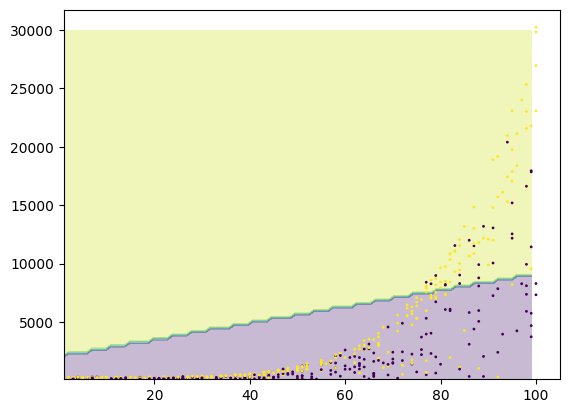

In [24]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

### Estimadores não lineares e support vector machine

No módulo `sklearn.svm`, teremos diversas variações de algoritmos baseados em uma única ideia: *Suport Vector Machines*, isto é, **SVM**. Estávamos utilizando anteriormente o LinearSVC, ou Suport Vector Classification, que é baseado em relacionamentos lineares.
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [25]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 59.07%


/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


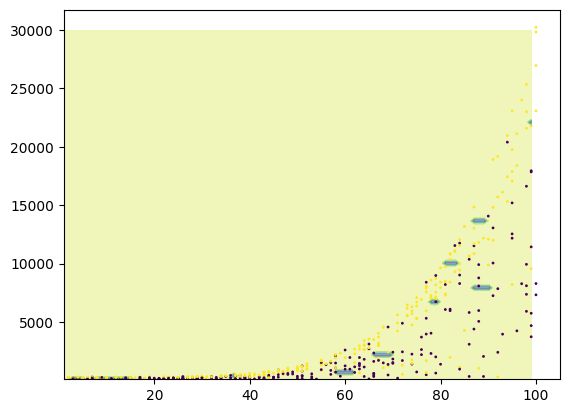

In [27]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# DECISION BOUNDARY

#### Escalas distintas em features causam um desbalanço no algoritmo. 

Uma alternativa para solucionarmos esse problema é **reescalarmos** todo o nosso projeto para uma faixa similar. Faremos isso utilizando o escalador padrão do Sklearn, o `StandardScaler()`, que é uma fase de pré-processamento e padronização de valores.

In [29]:
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))


scaler = StandardScaler() # Gerando escalador
scaler.fit(raw_treino_x) # Treinando escalador

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


In [31]:
# x_min = teste_x.horas_esperadas.min()
# x_max = teste_x.horas_esperadas.max()
# y_min = teste_x.preco.min()
# y_max = teste_x.preco.max()

# pixels = 100
# eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
# eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

# xx, yy = np.meshgrid(eixo_x, eixo_y)
# pontos = np.c_[xx.ravel(), yy.ravel()]

# Z = modelo.predict(pontos)
# Z = Z.reshape(xx.shape)

# import matplotlib.pyplot as plt

# plt.contourf(xx, yy, Z, alpha=0.3)
# plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# # DECISION BOUNDARY

### saída:
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Input In [30], in <cell line: 1>()
----> 1 x_min = teste_x.horas_esperadas.min()
      2 x_max = teste_x.horas_esperadas.max()
      3 y_min = teste_x.preco.min()

**`AttributeError: 'numpy.ndarray' object has no attribute 'horas_esperadas'`**

Isso aconteceu porque nossas novas variáveis `teste_x` e `treino_x` são arrays de arrays (que, na nova escala, só possuem dois valores).

In [33]:
treino_x

array([[-1.20810685, -0.58850785],
       [-0.25992095, -0.48069545],
       [ 1.46086087,  0.13548927],
       ...,
       [-0.57598292, -0.58492075],
       [ 1.21503489,  0.45294796],
       [ 1.1799169 ,  1.18670998]])

In [35]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

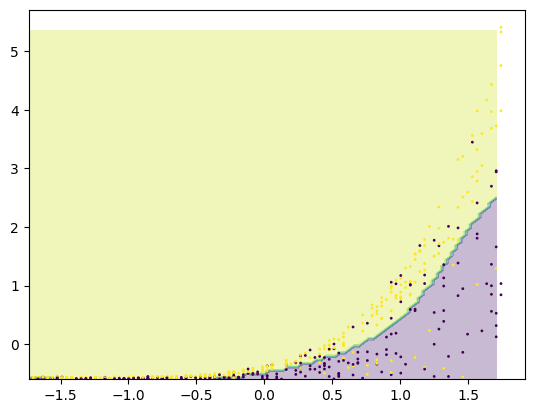

In [36]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)


Aprendemos que existem diversos estimadores, os **dois** que utilizamos até agora são baseados em um algoritmo chamado **Suport Vector Machine**. Um deles possui uma restrição e consegue apenas estabelecer *relacionamentos lineares*, e o outro é capaz de elaborar *curvas* e atinge uma taxa de acurácia mais interessante no caso do nosso projeto.